# UCB algorithm

Parameter $\alpha \in \mathbb{R} \mid \alpha \geq 0$ controls the trade-off between exploration and exploitation.

$$ A_{t+1} = \arg\max_i \frac{S_{i,t}}{N_{i,t}} + \sqrt{\alpha \frac{\ln(t)}{N_{i,t}}} $$

Considering bounded rewards $R_t \in [0, 1]$, formal regret analyses about optimal assymptotic behavior have been done for $\alpha \geq 2$, then $\alpha \geq 1$, and finally for $\alpha \geq 1/2$ (Bubeck, Thesis, 2010).

Note that all those proves concerns rewards bounded into the interval $[0, 1]$.

In fact to preserve the same behavior for different intervals $[r_\textit{min}, r_\textit{max}]$, the formula becomes:

$$ A_{t+1} = \arg\max_i \frac{S_{i,t}}{N_{i,t} (r_\textit{max} - r_\textit{min})} + \sqrt{\alpha \frac{\ln(t)}{N_{i,t}}} $$

or

$$ A_{t+1} = \arg\max_i \frac{S_{i,t}}{N_{i,t}} + \sqrt{\alpha \ (r_\textit{max} - r_\textit{min})^2 \, \frac{\ln(t)}{N_{i,t}}} $$

by simplicity we can use the classical formula with $\alpha' = (r_\textit{max} - r_\textit{min})^2 \, \alpha$.


In this way, the estimated mean reward becomes a kind of estimated success rate.


In [1]:
#Import Dependencies
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams["figure.figsize"] = (8,5)

import setup

from magb.arms import BernoulliArm
from magb.policies import UCBPolicy
from magb.simulator import SMAB

In [2]:
#relation between variance and reward amplitude considering extended Bernoulli Distributions
print(np.var([0,1]))
print((1-0)**2 / 4)
print(np.var([-1,1]))
print((1+1)**2 / 4)

0.25
0.25
1.0
1.0


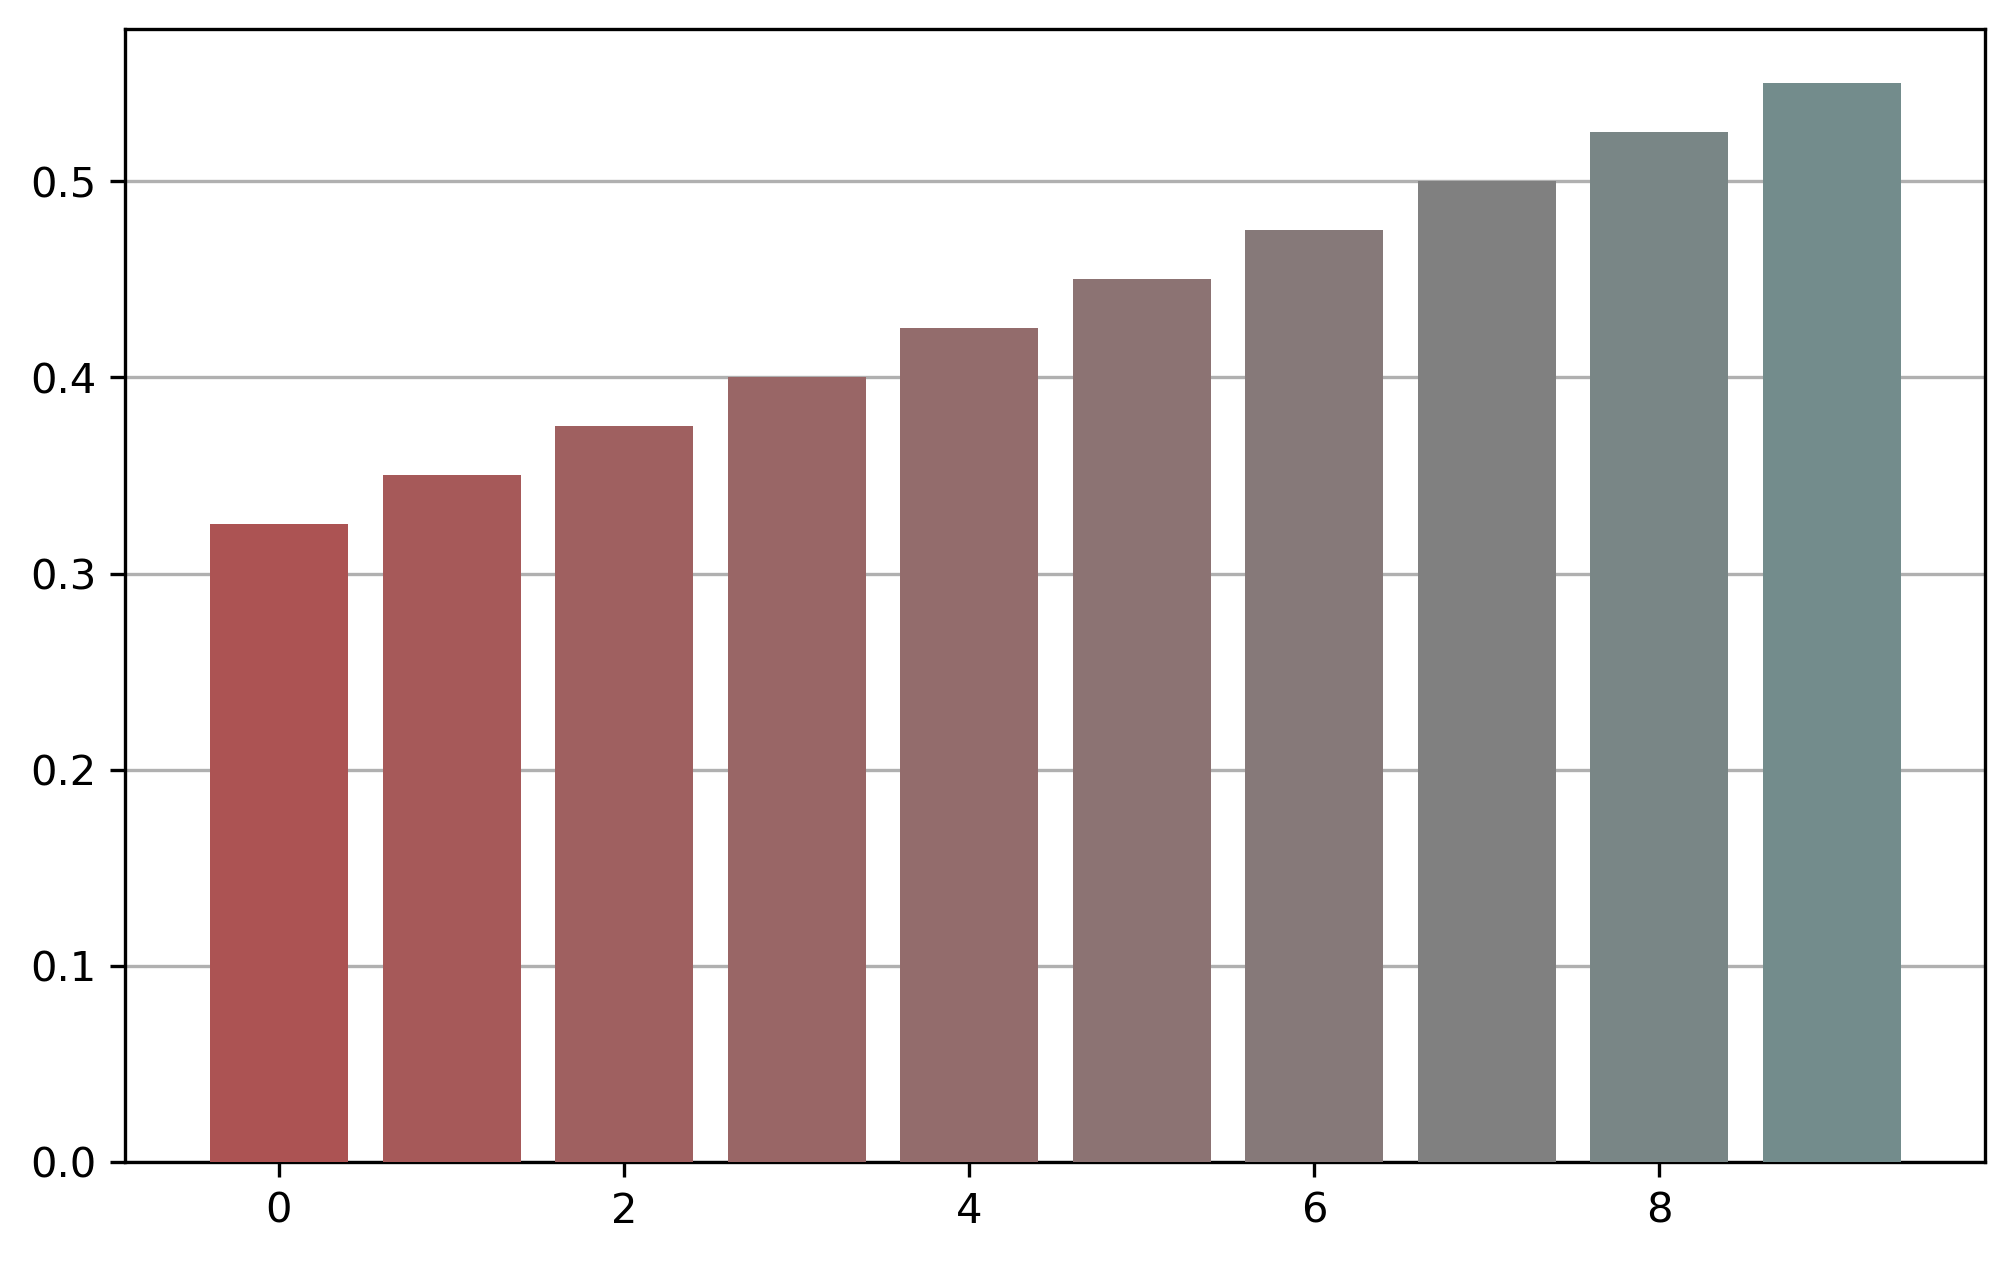

In [3]:
#number of arms and corresponding parameters
p_arr = [0.325, 0.350, 0.375, 0.400, 0.425, 0.450, 0.475, 0.500, 0.525, 0.550]
k = len(p_arr)

fig, ax = plt.subplots(1)
ax.grid(visible=True, which='major', axis='y', zorder=0)
for i, p in enumerate(p_arr):
    ax.bar(i, p, zorder=3, color=(1-p, p, p, 1.0))
plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
../../packages/magb\magb\simulator.py:309: RuntimeWarning: invalid value encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


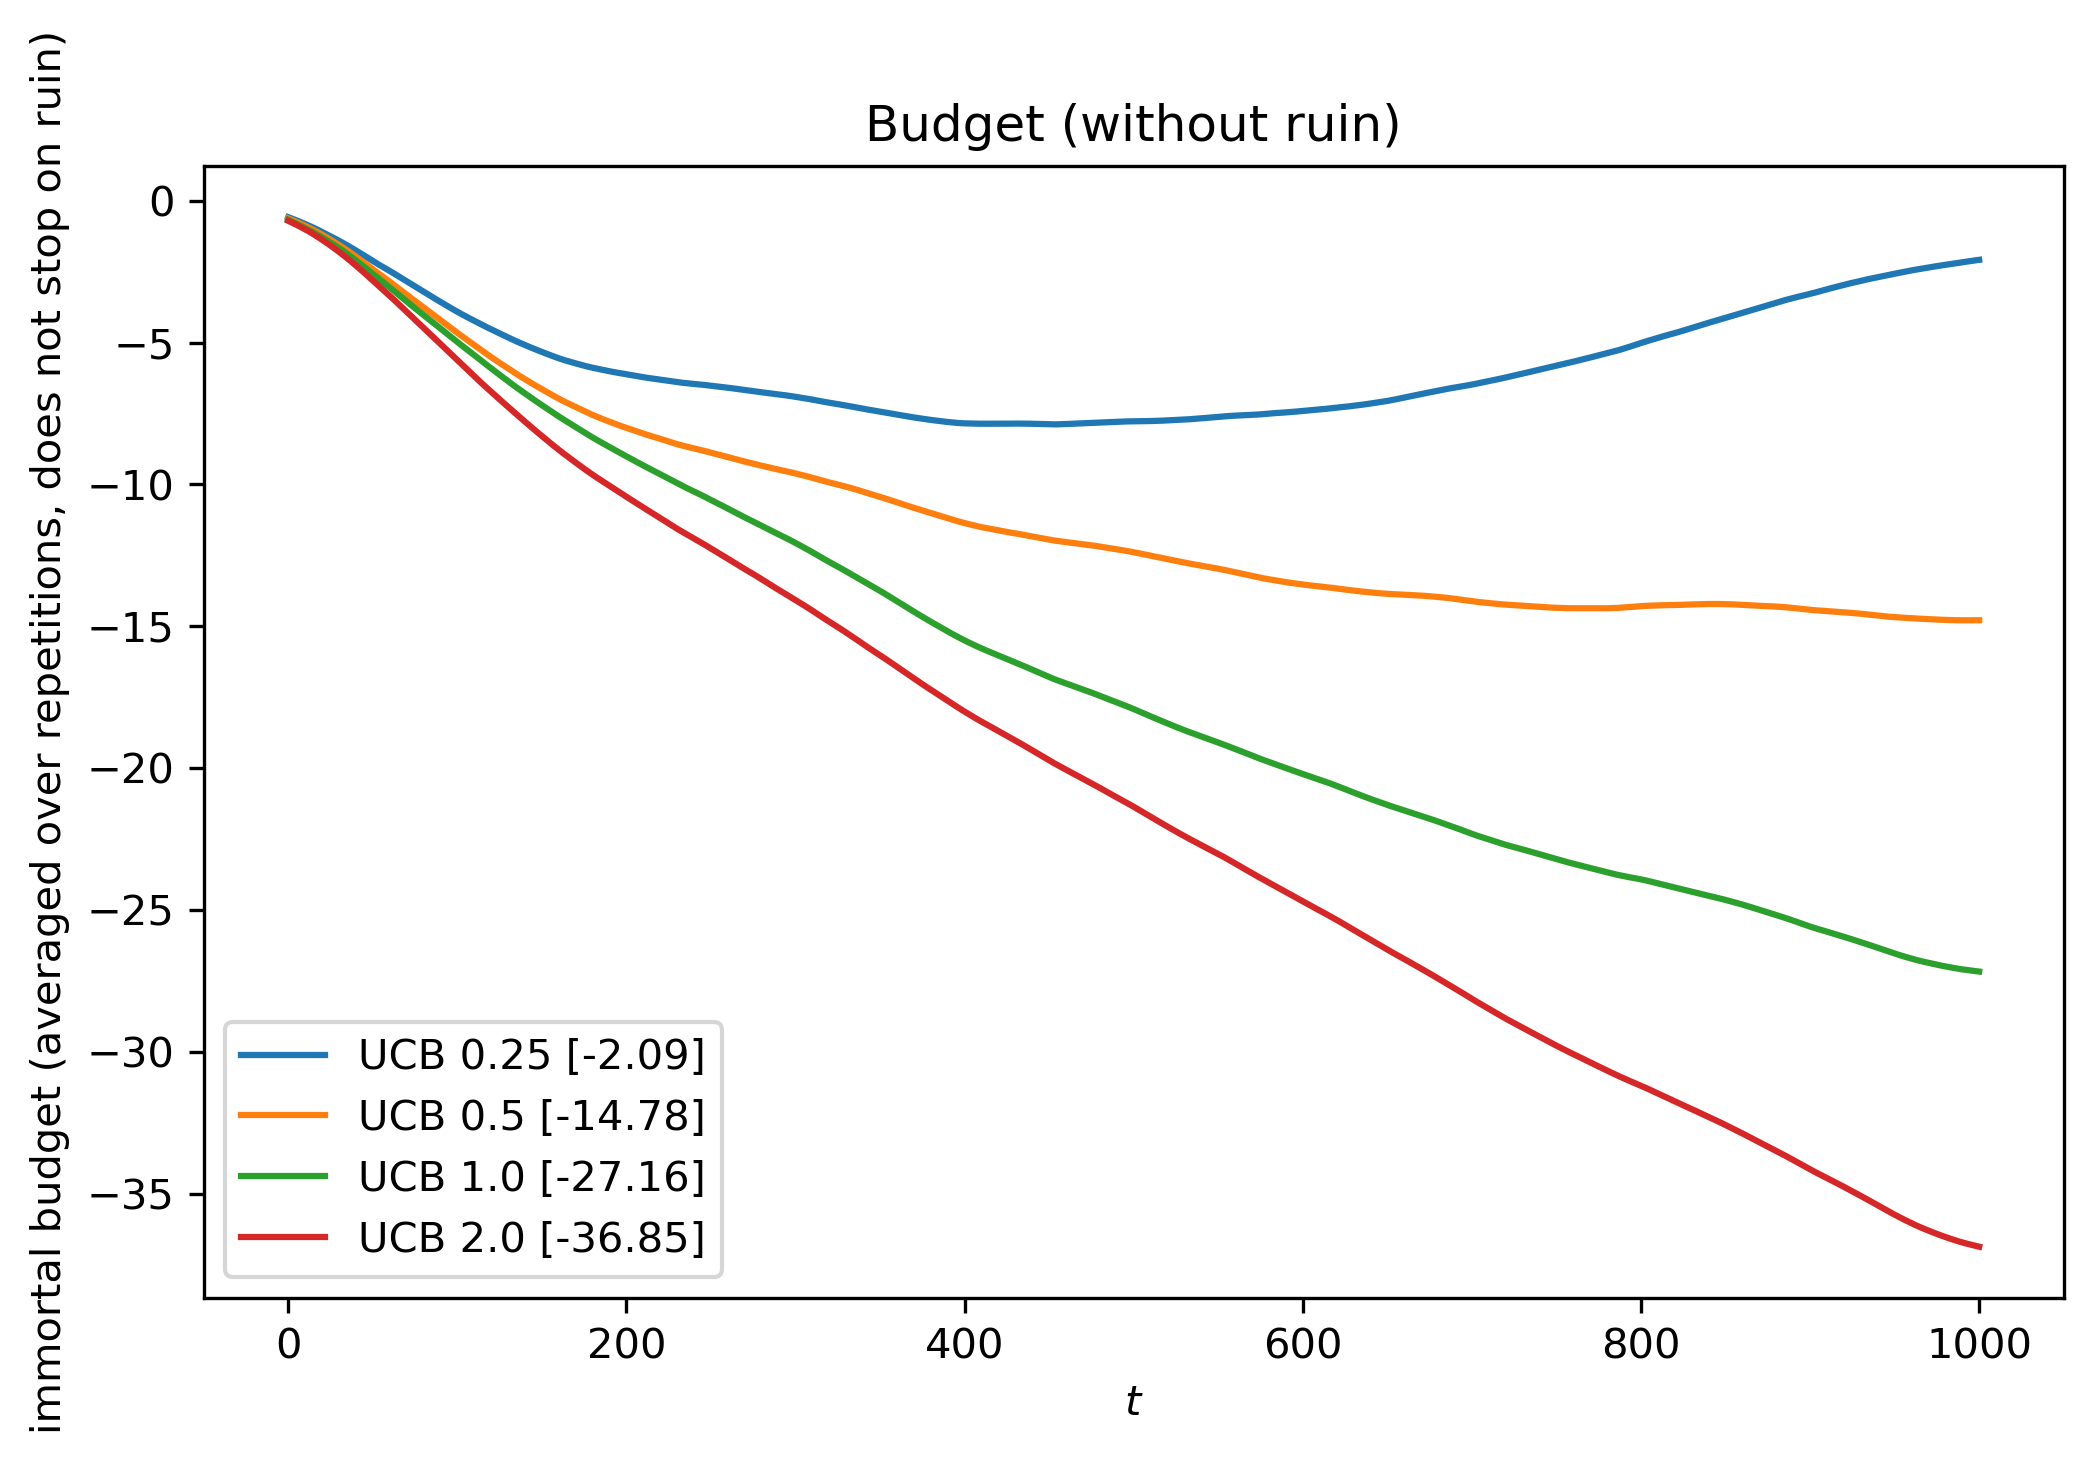

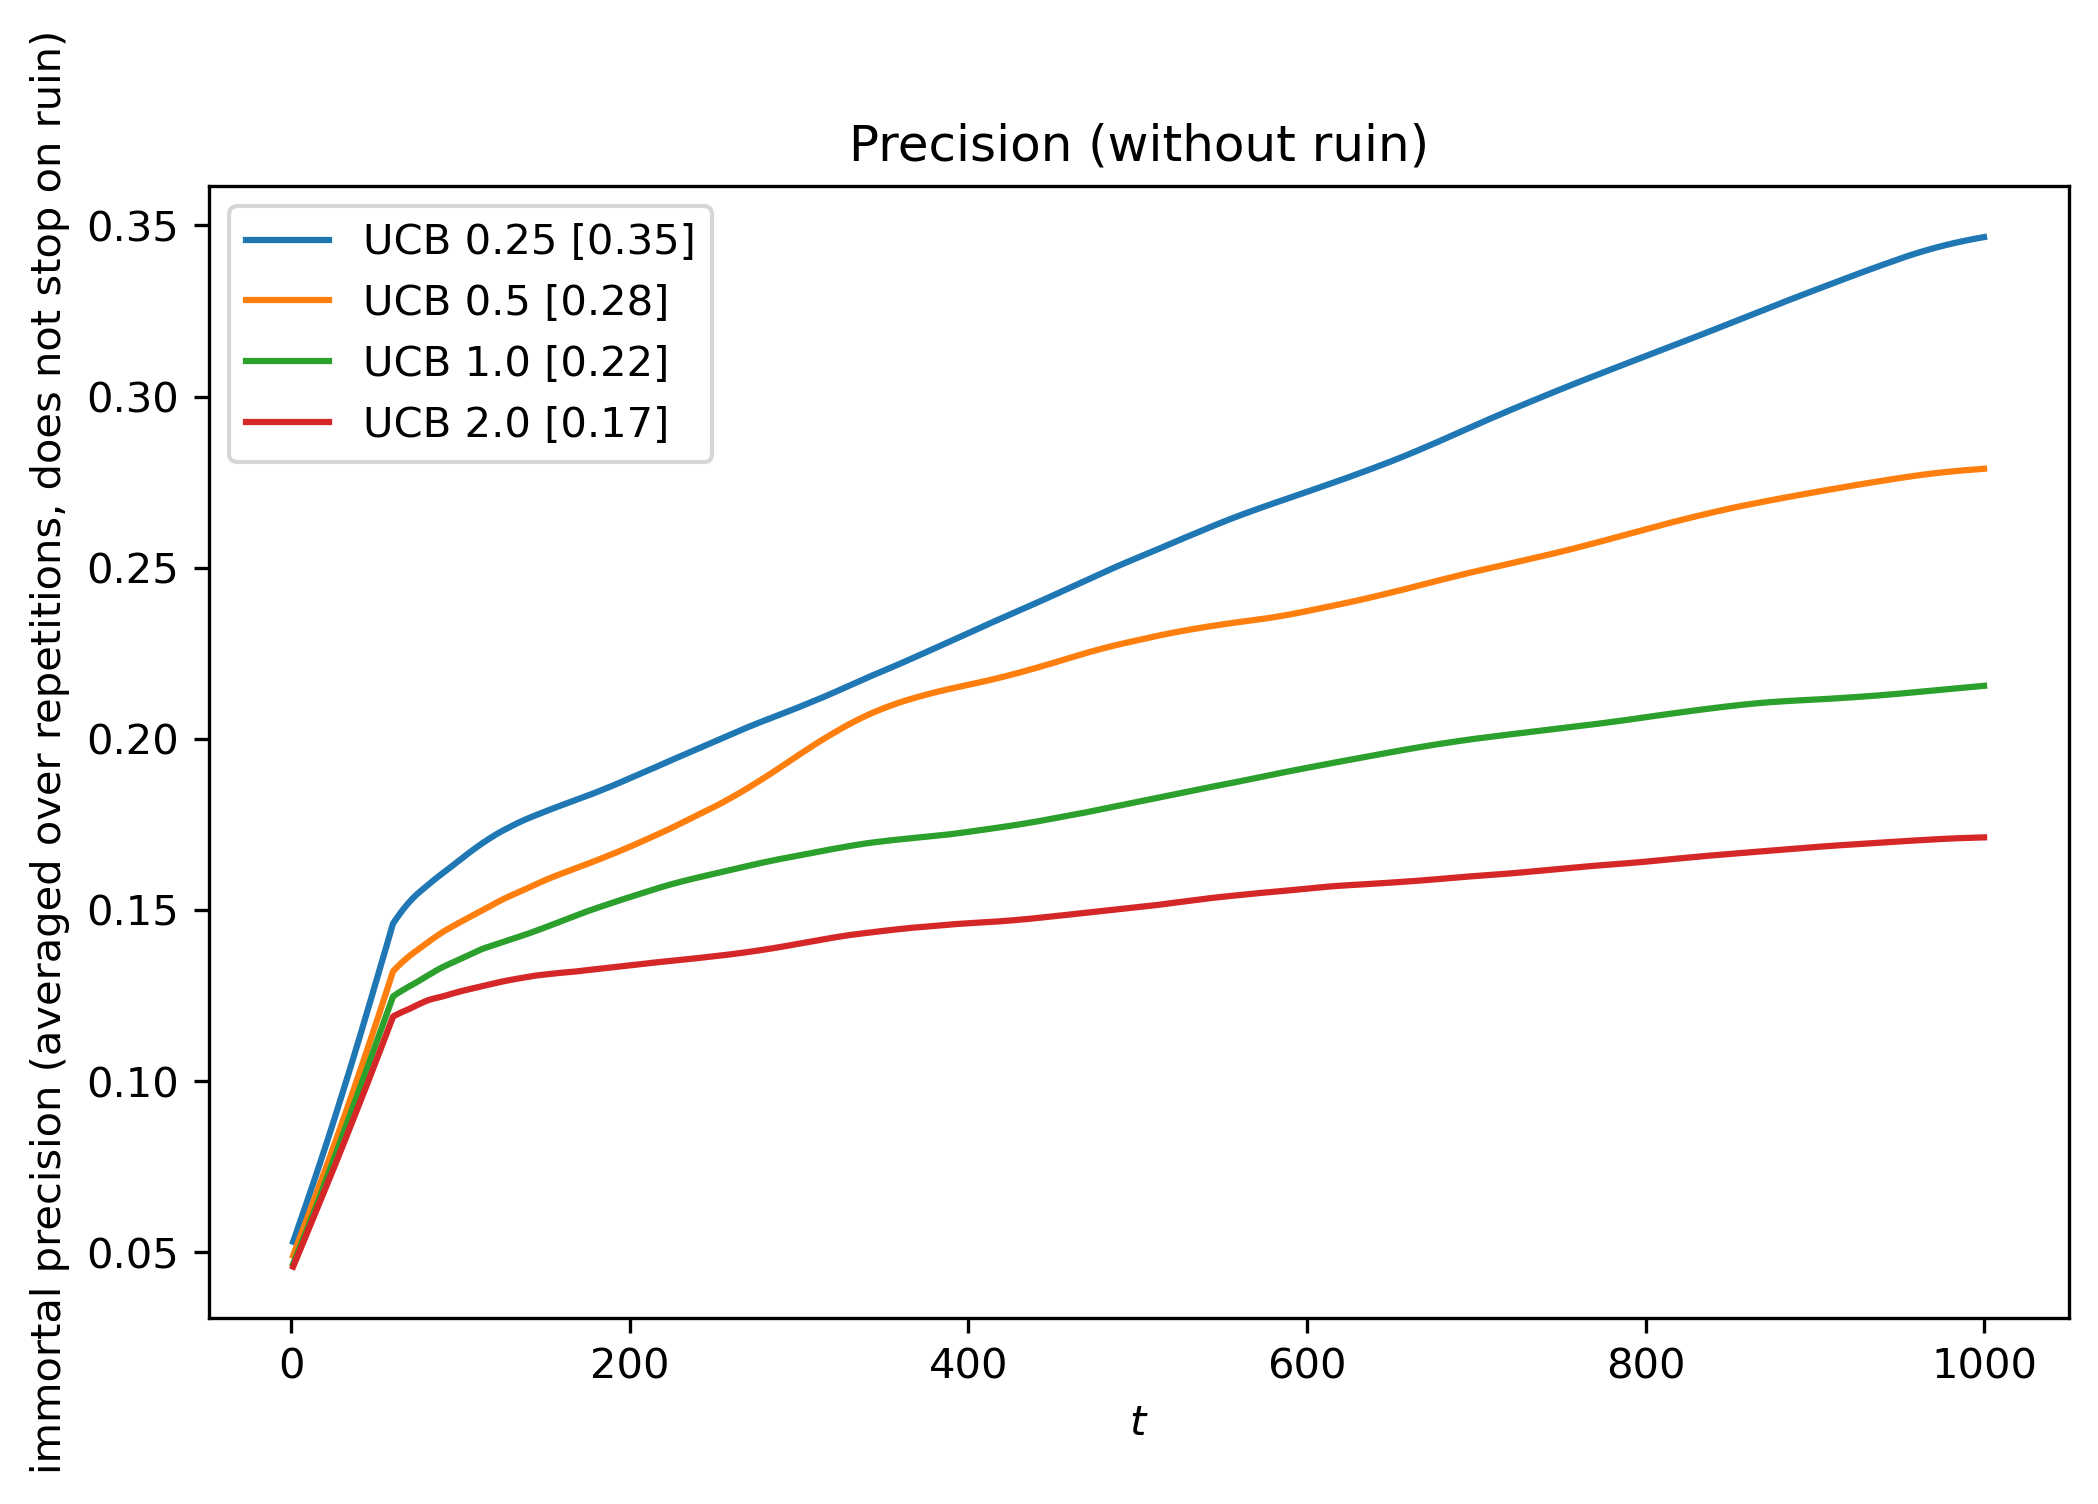

In [8]:
#time-horizon
h = 1000

#repetitions
n = 200

#each arm must be tried at least w times at beginning
w=1

#for smoothing graphics
smooth_window = 100

r_min = -0.5
r_max = +0.5

#Bernoulli
arms = [BernoulliArm(p, minr=r_min, maxr=r_max) for p in p_arr]

#algorithms
algs = [
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=0.25, label="UCB 0.25"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=0.5, label="UCB 0.5"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=1.0, label="UCB 1.0"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=2.0, label="UCB 2.0")
    ]

sim1 = SMAB(arms, algs, h, b_0=0, n=n, use_multiprocess=True, prev_draw=True)
sim1.run(tqdm_leave=True)

sim1.plot('immortal_budget', smooth_window=smooth_window)
sim1.plot('immortal_precision', smooth_window=smooth_window)

  0%|          | 0/200 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


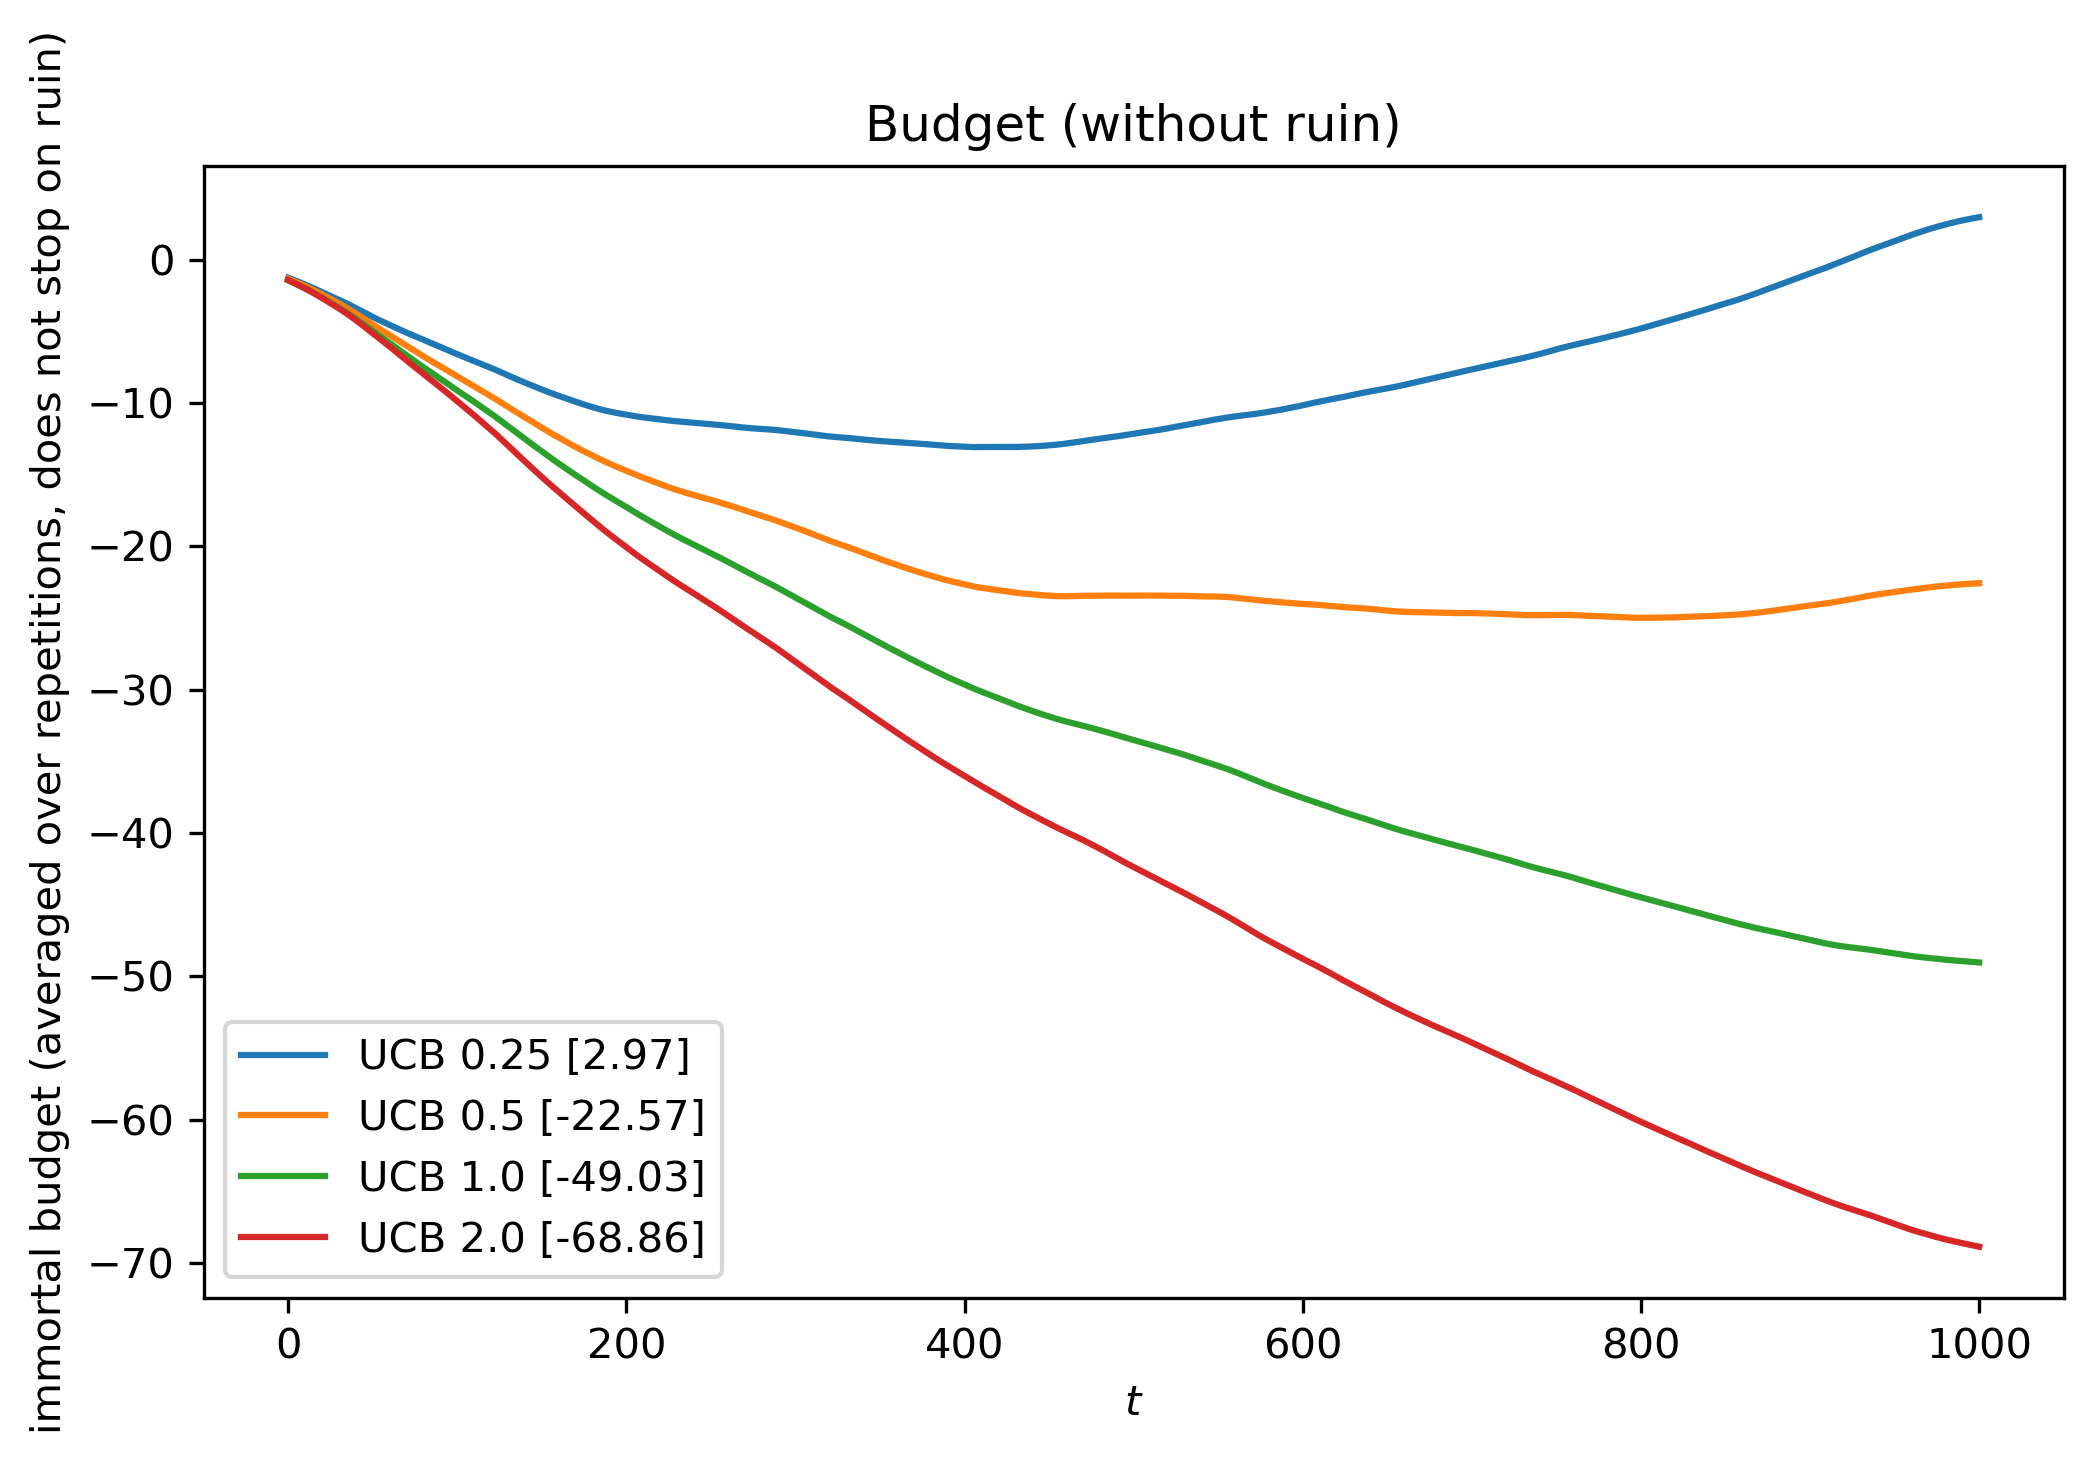

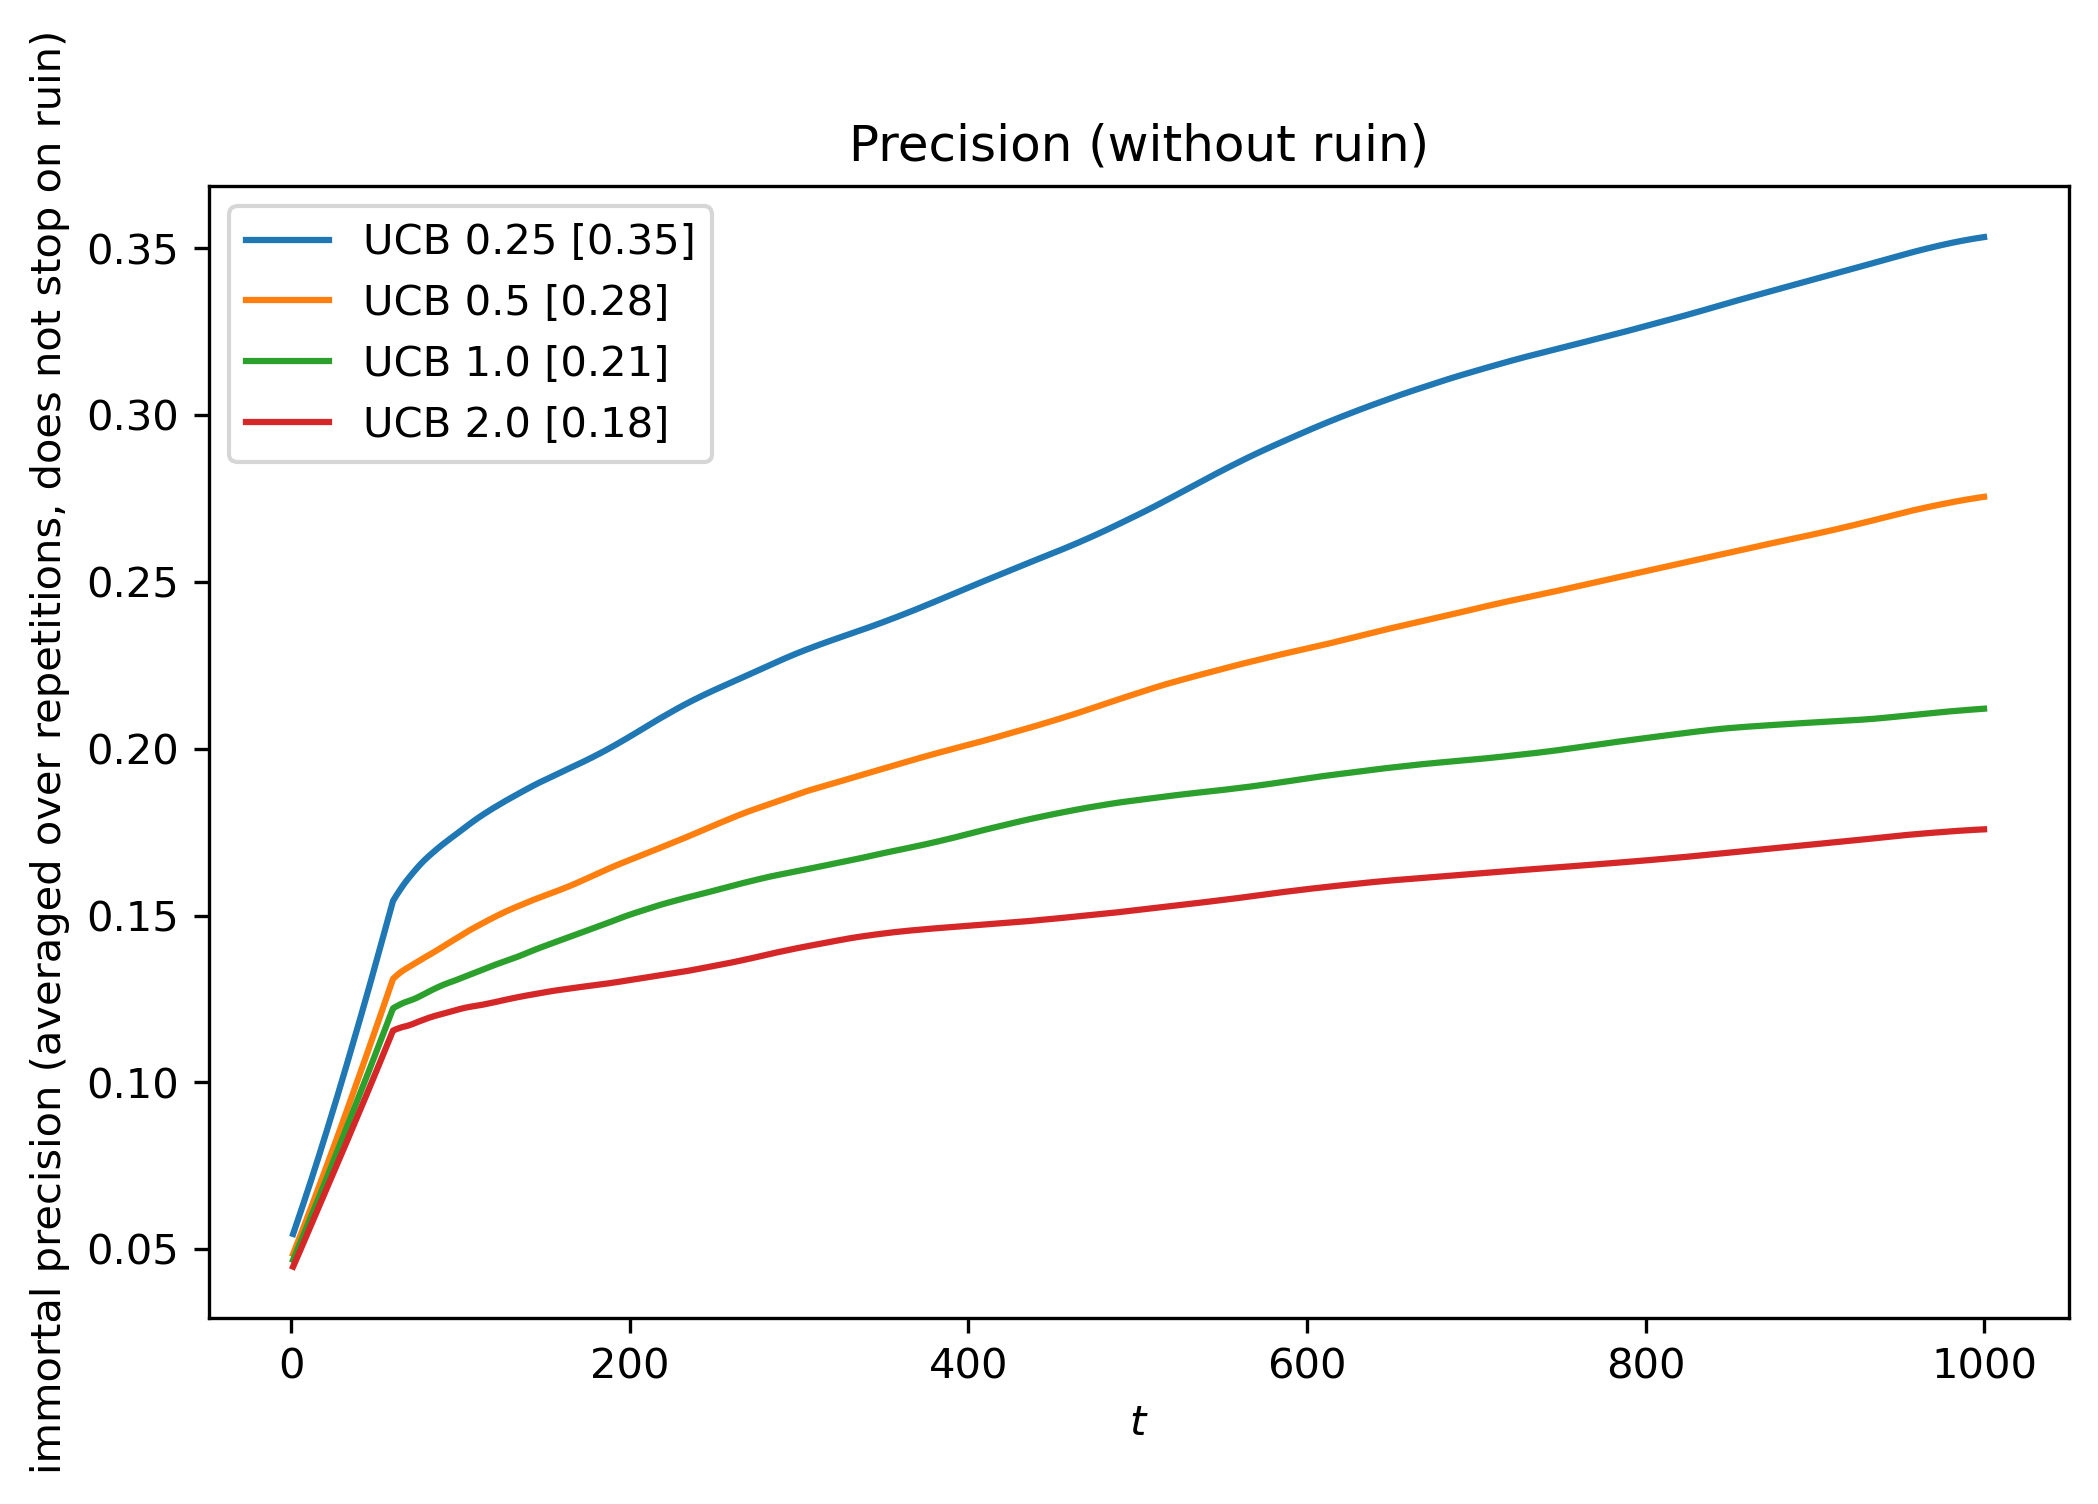

In [6]:
r_min = -1.0
r_max = +1.0

#Bernoulli
arms = [BernoulliArm(p, minr=r_min, maxr=r_max) for p in p_arr]

#algorithms
algs = [
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=0.25, label="UCB 0.25"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=0.5, label="UCB 0.5"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=1.0, label="UCB 1.0"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=2.0, label="UCB 2.0")
    ]

sim2 = SMAB(arms, algs, h, b_0=0, n=n, use_multiprocess=True, prev_draw=True)
sim2.run(tqdm_leave=True)

sim2.plot('immortal_budget', smooth_window=smooth_window)
sim2.plot('immortal_precision', smooth_window=smooth_window)

  0%|          | 0/200 [00:00<?, ?it/s]

../../packages/magb\magb\simulator.py:309: RuntimeWarning: divide by zero encountered in true_divide
  self.fr_a = sr_a / self.SR[:,:,-1,np.newaxis]
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


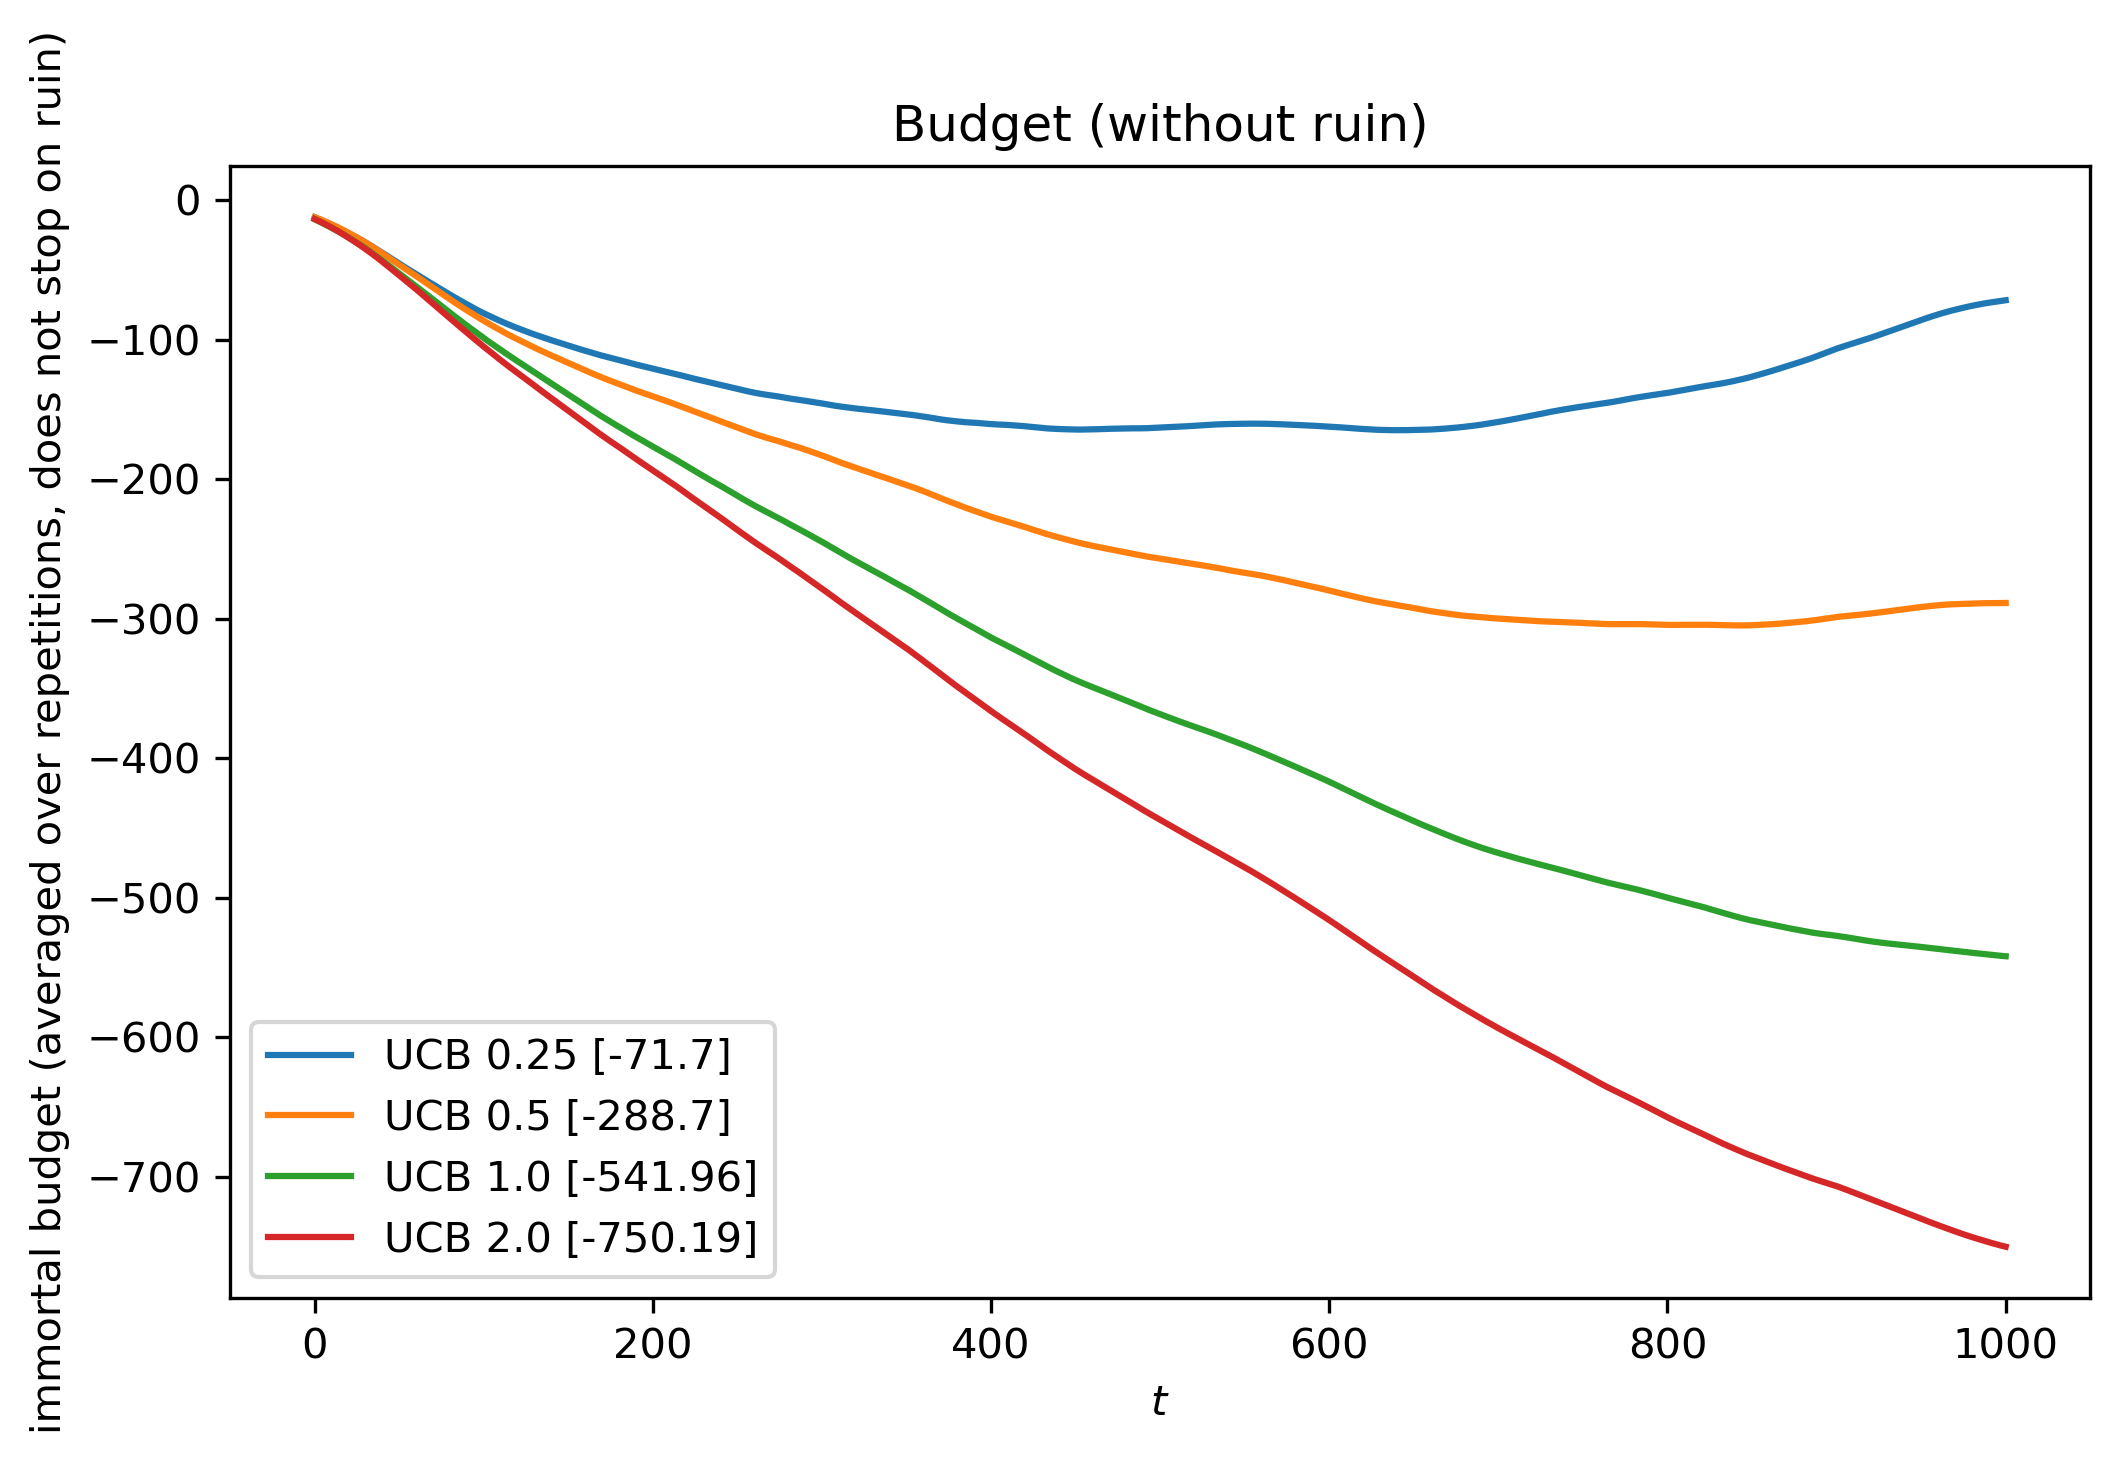

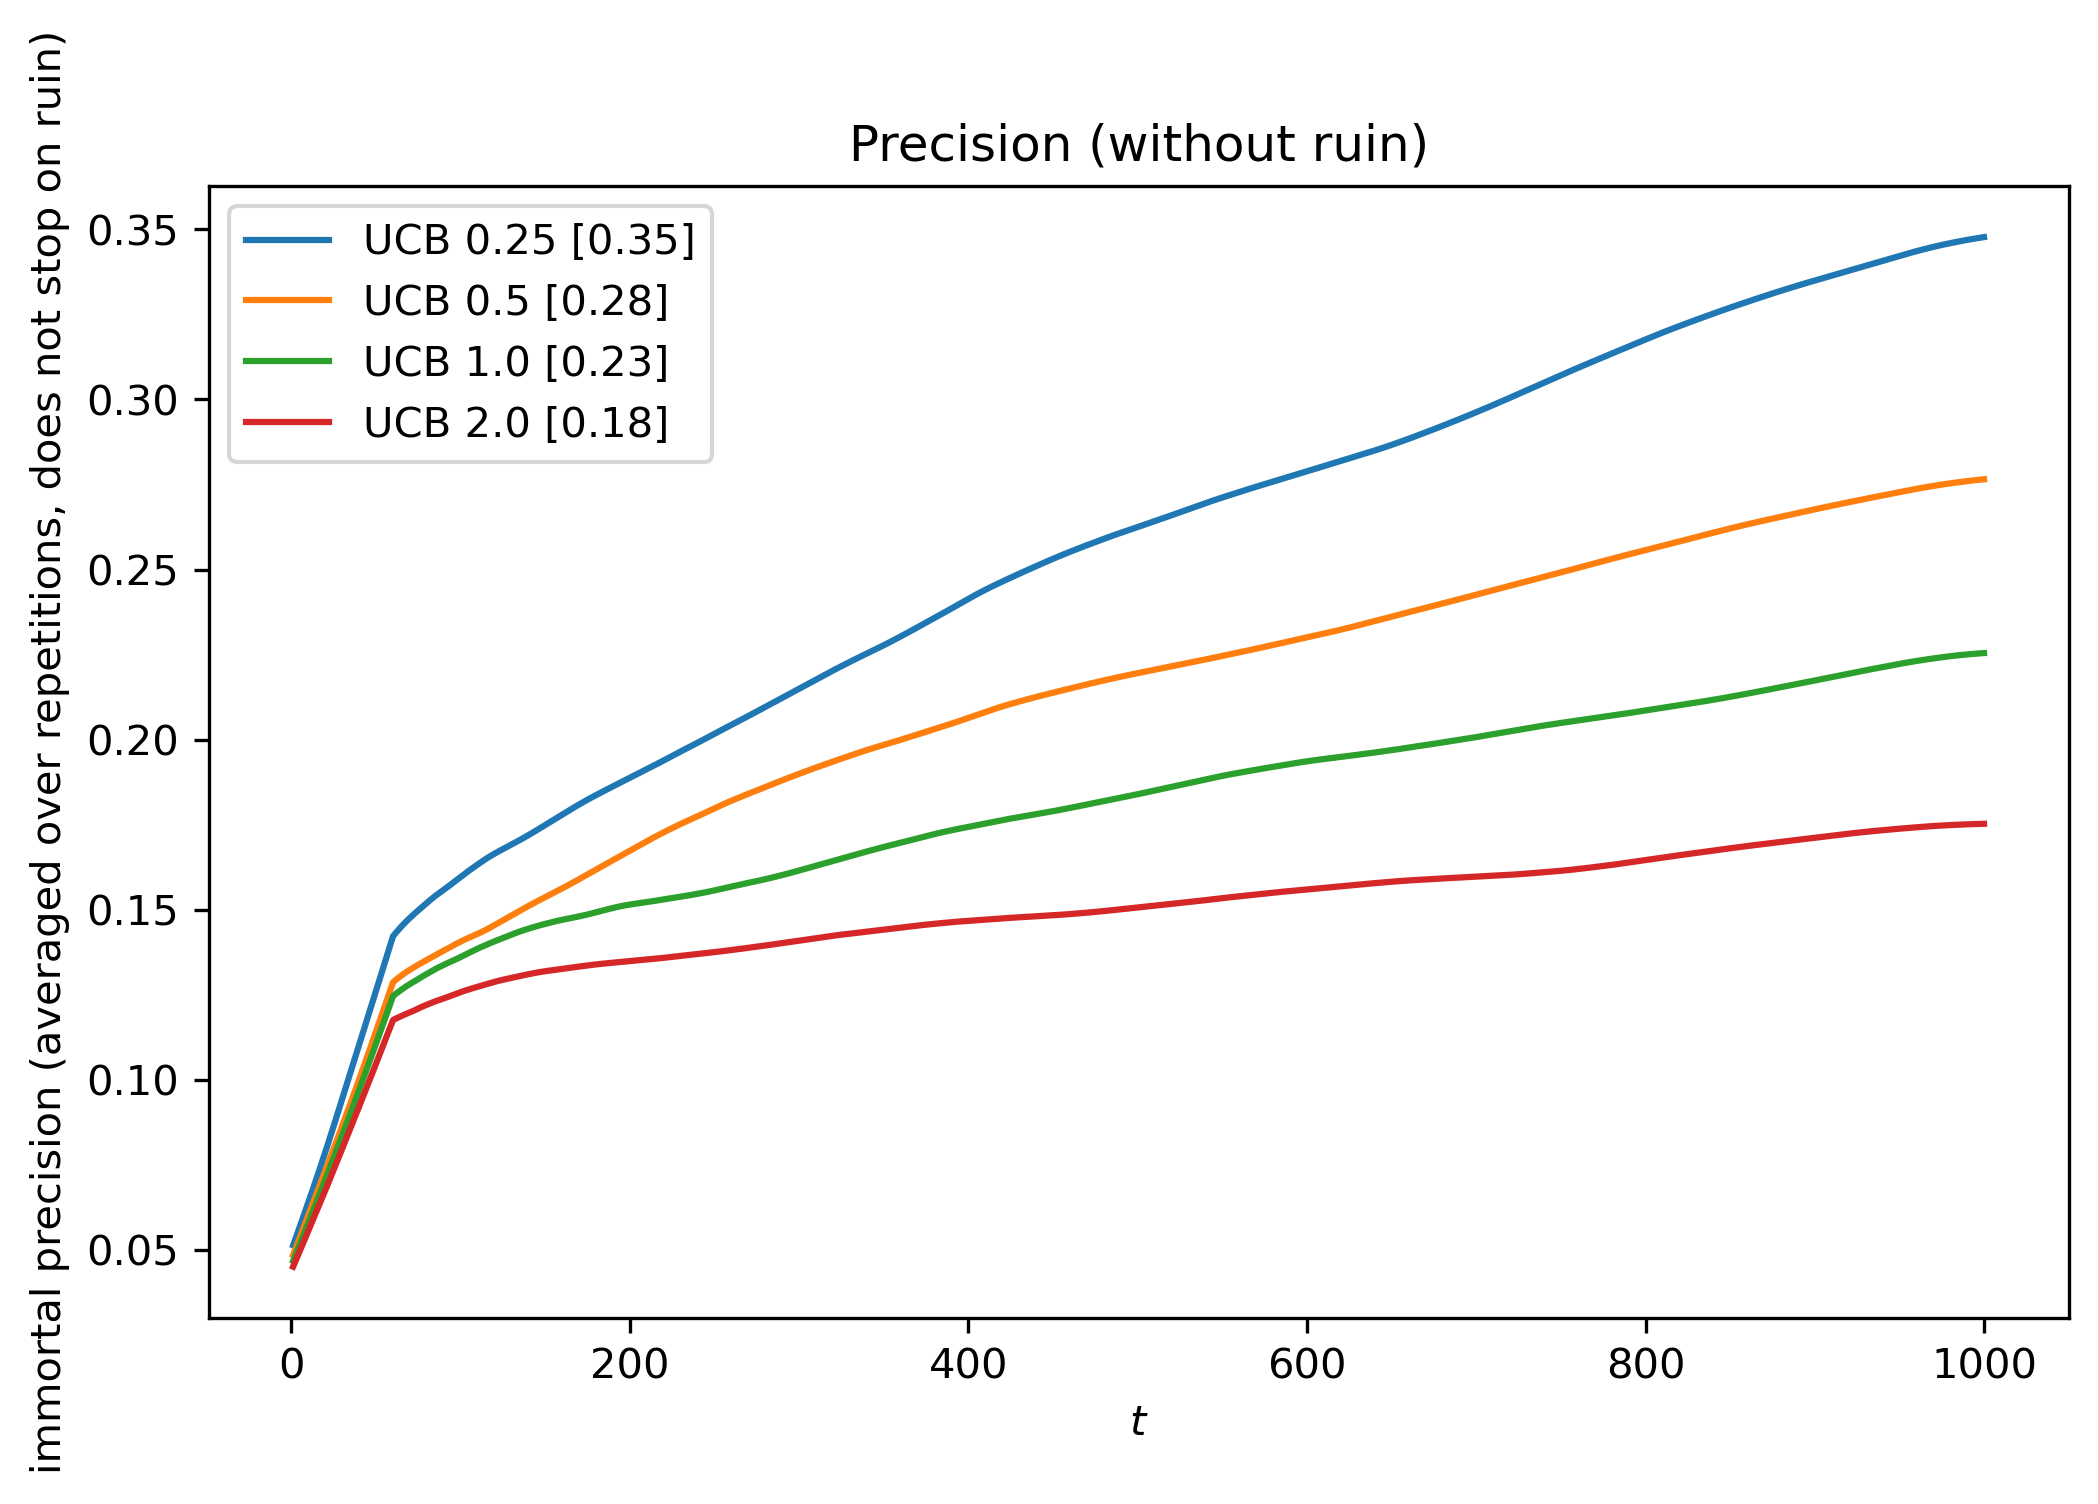

In [7]:
r_min = -10.0
r_max = +10.0

#Bernoulli
arms = [BernoulliArm(p, minr=r_min, maxr=r_max) for p in p_arr]

#algorithms
algs = [
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=0.25, label="UCB 0.25"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=0.5, label="UCB 0.5"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=1.0, label="UCB 1.0"),
     UCBPolicy(k, w=w, r_min=r_min, r_max=r_max, alpha=2.0, label="UCB 2.0")
    ]

sim3 = SMAB(arms, algs, h, b_0=0, n=n, use_multiprocess=True, prev_draw=True)
sim3.run(tqdm_leave=True)

sim3.plot('immortal_budget', smooth_window=smooth_window)
sim3.plot('immortal_precision', smooth_window=smooth_window)